<a href="https://colab.research.google.com/github/maazali04/Projects/blob/main/Linear%20Regression%20Models/Salary%20Prediction/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction Using Linear Regression

> **Project Type:** Supervised Regression <br>
> **Model**: Linear Regression (scikit-learn) <br>
> **Level**: Applied ML (Foundational) <br>

## 1. Project Overview

**Objective:** The objective of this project is to utilize **Linear Regression** to predict an individual's salary based on their years of experience.

## 2. Dataset Description
The dataset for this linear regression model is provided by **Kaggle's [Salary Dataset](https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression/data?select=Salary_Data.csv)**.


<table>
    <thead>
        <tr>
            <th>Column</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>YearsExperience</strong></td>
            <td>The total number of years of professional work experience.</td>
        </tr>
        <tr>
            <td><strong>Salary</strong></td>
            <td>The total annual compensation received by the individual.</td>
        </tr>
    </tbody>
</table>


### Target
- Salary

### Feature
- YearsExperience

## 3. Data Loading and Initial Inspection

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
salary_df = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data.csv")

In [ ]:
salary_df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
salary_df.shape

(30, 2)

The data frame contains 30 rows across 2 distinct columns.

Checking for Missing values ...

In [ ]:
salary_df.isnull().sum()

,0
YearsExperience,0
Salary,0


This confirms that the dataset contains no missing values.

## 4. Exploratory Data Analysis (EDA)

In [ ]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [ ]:
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Identifying oultiers ...

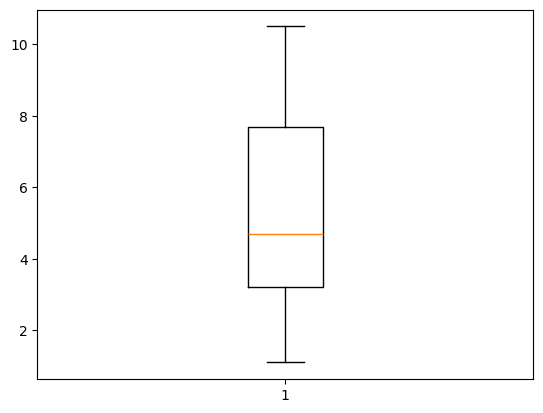

In [ ]:
plt.boxplot(salary_df['YearsExperience']);

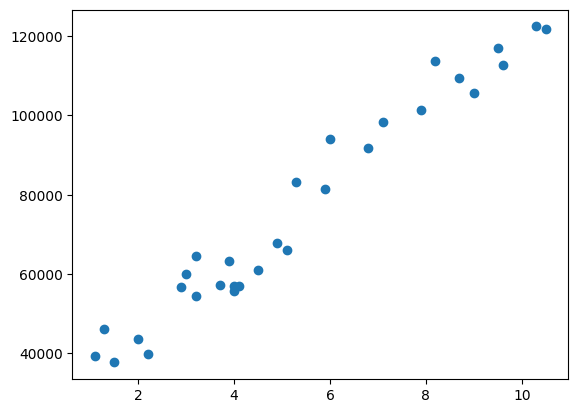

In [ ]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary']);

The dataset is clean and free of outliers.

Identifying duplicates ...

In [ ]:
salary_df.duplicated().sum()

np.int64(0)

In [ ]:
salary_df.nunique()

,0
YearsExperience,28
Salary,30


Analyzing correlation ...

In [ ]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


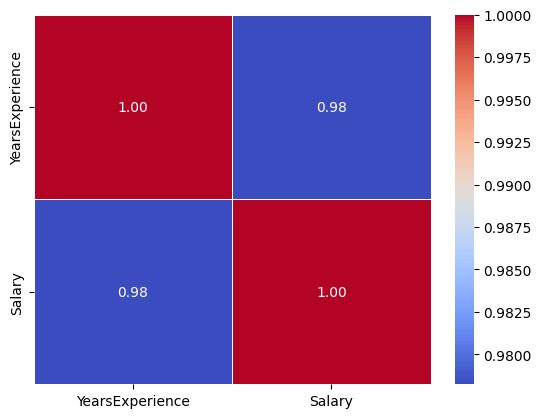

In [ ]:
sns.heatmap(salary_df.corr(), annot=True, cmap = "coolwarm", fmt=".2f", linewidth = "0.5");

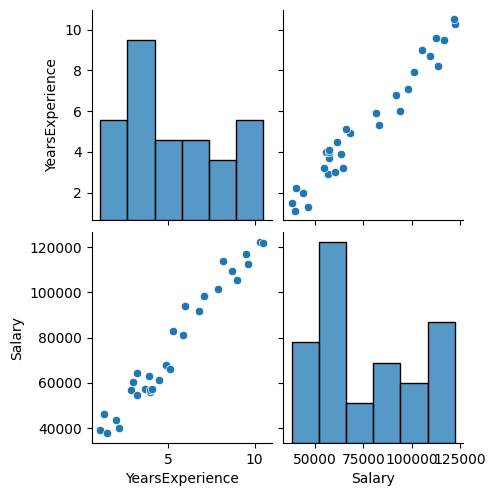

In [ ]:
sns.pairplot(salary_df);

Data quality validation confirms a clean dataset with **zero duplicates, outliers, or missing entries.** The variables are natively **float64**, eliminating the need for encoding. Additionally, because the independent variable exists on a small scale (1-10), the model is not susceptible to feature dominance, making **standardization or normalization** redundant for this Linear Regression task Notably, the variables exhibit a very high **correlation,** indicating a strong linear relationship that significantly increases the probability of high model accuracy and predictive performance.

## 5. Train-Test Split

In [ ]:
x = salary_df.drop("Salary", axis = 1)
y = salary_df["Salary"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## 6. Model Training - Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope: 9423.815323030976
Intercept: 25321.583011776813


In [ ]:
y_pred = model.predict(x_test)

## 7. Model Evaluation

In [ ]:
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.9024461774180497


In [ ]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 49830096.85590839


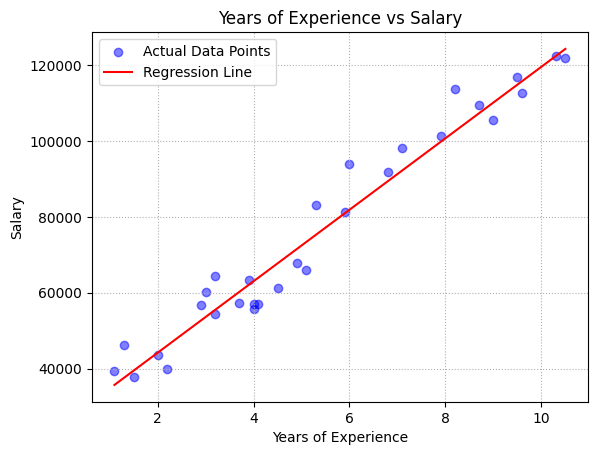

In [ ]:
plt.scatter(x,y, color ="blue", alpha = 0.5, label="Actual Data Points");
plt.plot(x, model.predict(x), color = "red", label="Regression Line");
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.legend()
plt.grid(linestyle=":")
plt.show();

## 8. Prediction

In [ ]:
import warnings
warnings.filterwarnings("ignore")

print(f"4 year experience -> Salary: {model.predict([[4]])}")
print(f"10 year experience -> Salary: {model.predict([[10]])}")

4 year experience -> Salary: [63016.8443039]
10 year experience -> Salary: [119559.73624209]


## 9. Conclusion
The model successfully captured the linear relationship between experience and compensation, making it a reliable tool for baseline salary estimation.